<a href="https://colab.research.google.com/github/Denchil-RPG/Machine/blob/main/Lab_Ponijenie_Ezmernosty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Библиотеки

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Датасет user_behavior_dataset.csv

https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset

Идентификатор пользователя: уникальный идентификатор для каждого пользователя.
Модель устройства: Модель смартфона пользователя.
Операционная система: ОС устройства (iOS или Android).
Время использования приложения: ежедневное время, потраченное на мобильные приложения, измеряемое в минутах.
Время включения экрана: среднее количество часов в день, когда экран активен.
Расход батареи: ежедневный расход батареи в мАч.
Количество установленных приложений: общее количество приложений, доступных на устройстве.
Использование данных: ежедневное потребление мобильных данных в мегабайтах.
Возраст: Возраст пользователя.
Пол: Пол пользователя (мужчина или женщина).
Класс поведения пользователей: классификация поведения пользователей на основе моделей использования (от 1 до 5).


Загрузка данных

In [7]:
data = pd.read_csv('user_behavior_dataset.csv', delimiter=',')
data

User ID        Device Model Operating System  App Usage Time (min/day)  \
0          1      Google Pixel 5          Android                       393   
1          2           OnePlus 9          Android                       268   
2          3        Xiaomi Mi 11          Android                       154   
3          4      Google Pixel 5          Android                       239   
4          5           iPhone 12              iOS                       187   
..       ...                 ...              ...                       ...   
695      696           iPhone 12              iOS                        92   
696      697        Xiaomi Mi 11          Android                       316   
697      698      Google Pixel 5          Android                        99   
698      699  Samsung Galaxy S21          Android                        62   
699      700           OnePlus 9          Android                       212   

     Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                           6.4                     1872   
1                           4.7                     1331   
2                           4.0                      761   
3                           4.8                     1676   
4                           4.3                     1367   
..                          ...                      ...   
695                         3.9                     1082   
696                         6.8                     1965   
697                         3.1                      942   
698                         1.7                      431   
699                         5.4                     1306   

     Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
0                          67                 1122   40    Male   
1                          42                  944   47  Female   
2                          32                  322   42    Male   
3                          56                  871   20    Male   
4                          58                  988   31  Female   
..                        ...                  ...  ...     ...   
695                        26                  381   22    Male   
696                        68                 1201   59    Male   
697                        22                  457   50  Female   
698                        13                  224   44    Male   
699                        49                  828   23  Female   

     User Behavior Class  
0                      4  
1                      3  
2                      2  
3                      3  
4                      3  
..                   ...  
695                    2  
696                    4  
697                    2  
698                    1  
699                    3  

[700 rows x 11 columns]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


Выберем 6 признаков

In [9]:
columns_work = ['App Usage Time (min/day)',	'Screen On Time (hours/day)',	'Battery Drain (mAh/day)',	'Number of Apps Installed',	'Data Usage (MB/day)',	'Age', 'User Behavior Class']

In [10]:
data_work = data[columns_work]
data_work

App Usage Time (min/day)  Screen On Time (hours/day)  \
0                         393                         6.4   
1                         268                         4.7   
2                         154                         4.0   
3                         239                         4.8   
4                         187                         4.3   
..                        ...                         ...   
695                        92                         3.9   
696                       316                         6.8   
697                        99                         3.1   
698                        62                         1.7   
699                       212                         5.4   

     Battery Drain (mAh/day)  Number of Apps Installed  Data Usage (MB/day)  \
0                       1872                        67                 1122   
1                       1331                        42                  944   
2                        761                        32                  322   
3                       1676                        56                  871   
4                       1367                        58                  988   
..                       ...                       ...                  ...   
695                     1082                        26                  381   
696                     1965                        68                 1201   
697                      942                        22                  457   
698                      431                        13                  224   
699                     1306                        49                  828   

     Age  User Behavior Class  
0     40                    4  
1     47                    3  
2     42                    2  
3     20                    3  
4     31                    3  
..   ...                  ...  
695   22                    2  
696   59                    4  
697   50                    2  
698   44                    1  
699   23                    3  

[700 rows x 7 columns]

In [11]:
df = data_work.copy()
df.drop(columns=['User Behavior Class'], inplace=True)

# Стандартизируем данные
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df = pd.DataFrame(df_scaled, columns=df.columns)
df

App Usage Time (min/day)  Screen On Time (hours/day)  \
0                    0.688256                    0.367626   
1                   -0.017668                   -0.186771   
2                   -0.661471                   -0.415053   
3                   -0.181443                   -0.154160   
4                   -0.475107                   -0.317218   
..                        ...                         ...   
695                 -1.011609                   -0.447664   
696                  0.253407                    0.498073   
697                 -0.972078                   -0.708557   
698                 -1.181031                   -1.165120   
699                 -0.333922                    0.041510   

     Battery Drain (mAh/day)  Number of Apps Installed  Data Usage (MB/day)  \
0                   0.423726                  0.606096             0.300405   
1                  -0.237198                 -0.322441             0.022277   
2                  -0.933550                 -0.693856            -0.949607   
3                   0.184279                  0.197540            -0.091787   
4                  -0.193218                  0.271823             0.091028   
..                       ...                       ...                  ...   
695                -0.541394                 -0.916705            -0.857419   
696                 0.537341                  0.643237             0.423843   
697                -0.712428                 -1.065271            -0.738668   
698                -1.336702                 -1.399544            -1.102733   
699                -0.267740                 -0.062451            -0.158975   

          Age  
0    0.126383  
1    0.709506  
2    0.292989  
3   -1.539682  
4   -0.623346  
..        ...  
695 -1.373076  
696  1.709145  
697  0.959416  
698  0.459596  
699 -1.289772  

[700 rows x 6 columns]

In [12]:
X = df
y = data_work['User Behavior Class']

Понижение размерности (Dimensionality Reduction)

Важность признаков

In [13]:
from sklearn.ensemble import RandomForestClassifier


# Обучаем модель
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Получаем важность признаков
importance = model.feature_importances_

# Создаем DataFrame для удобства
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)


feature_importance

Feature  Importance
0    App Usage Time (min/day)    0.261508
3    Number of Apps Installed    0.249287
4         Data Usage (MB/day)    0.227607
2     Battery Drain (mAh/day)    0.187503
1  Screen On Time (hours/day)    0.074095
5                         Age    0.000000

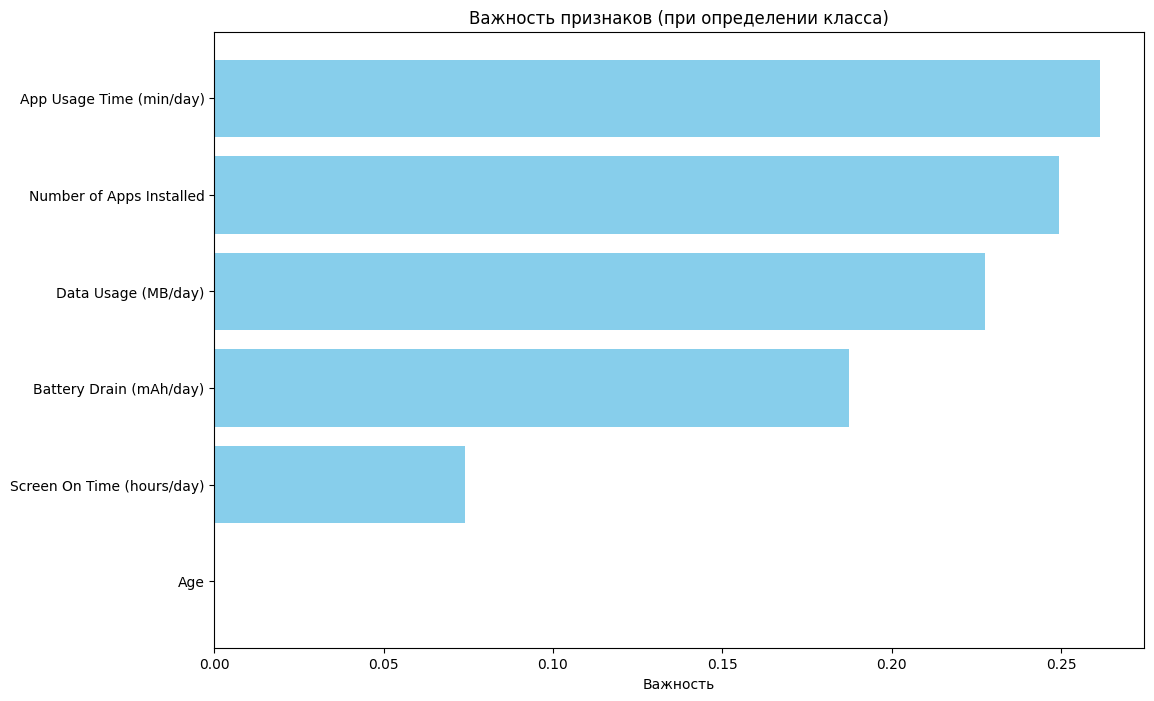

In [14]:
# Визуализация всех признаков
plt.figure(figsize=(12, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Важность')
plt.title('Важность признаков (при определении класса)')
plt.gca().invert_yaxis()  # Инвертируем ось y
plt.show()

Линейные методы уменьшения размерности (Linear Dimensionality Reduction Methods)

Метод главных компонентов (Principal Component Analysis, PCA)

<ipython-input-15-0a66704d48ff>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("Set1", len(unique_classes))  # Генерация цветовой карты для классов


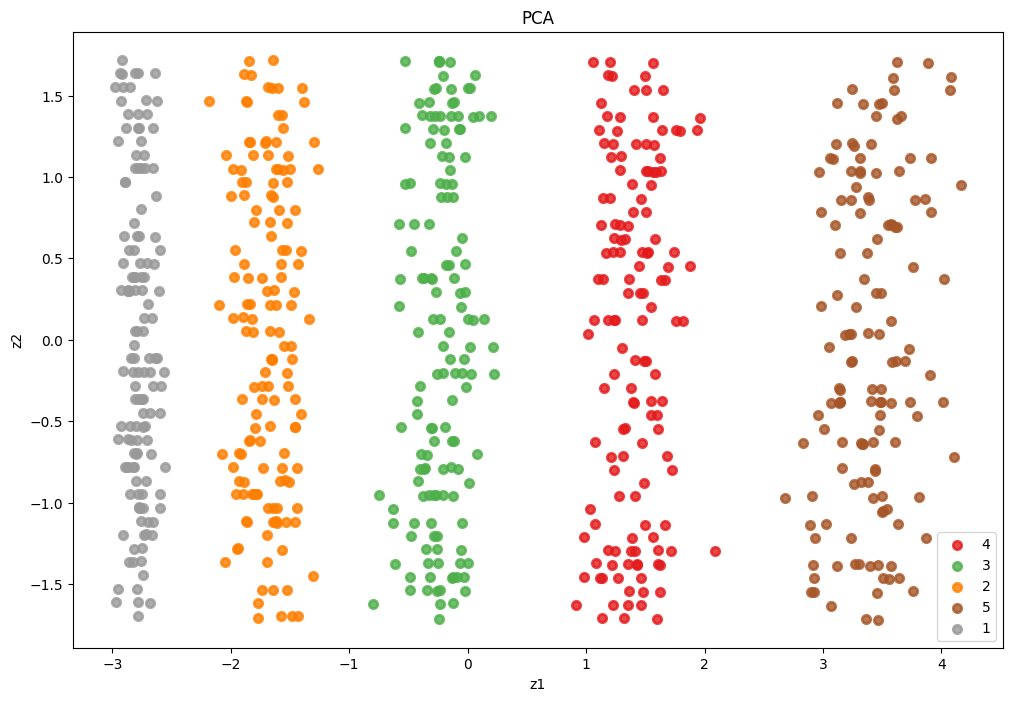

In [15]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_new = pca.fit(X).transform(X)


unique_classes = y.unique()
colors = plt.cm.get_cmap("Set1", len(unique_classes))  # Генерация цветовой карты для классов
# Визуализация
plt.figure(figsize=(12, 8))
for i, target_name in enumerate(unique_classes):
    plt.scatter(
        X_new[y == target_name, 0], X_new[y == target_name, 1],
        color=colors(i), alpha=0.8, lw=2, label=target_name
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.title("PCA")
plt.show()

In [16]:
pca.explained_variance_ratio_

array([0.79805236, 0.1666974 ])

Как можно видеть, первые главные компоненты сохраняют 79.8% дисперсии набора данных, тогда как вторые главные компоненты сохраняют только 16.7% дисперсии.

Независисый анализ компонентов (Independent Component Analysis, ICA)

<ipython-input-17-3aac2c321094>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("Set1", len(unique_classes))


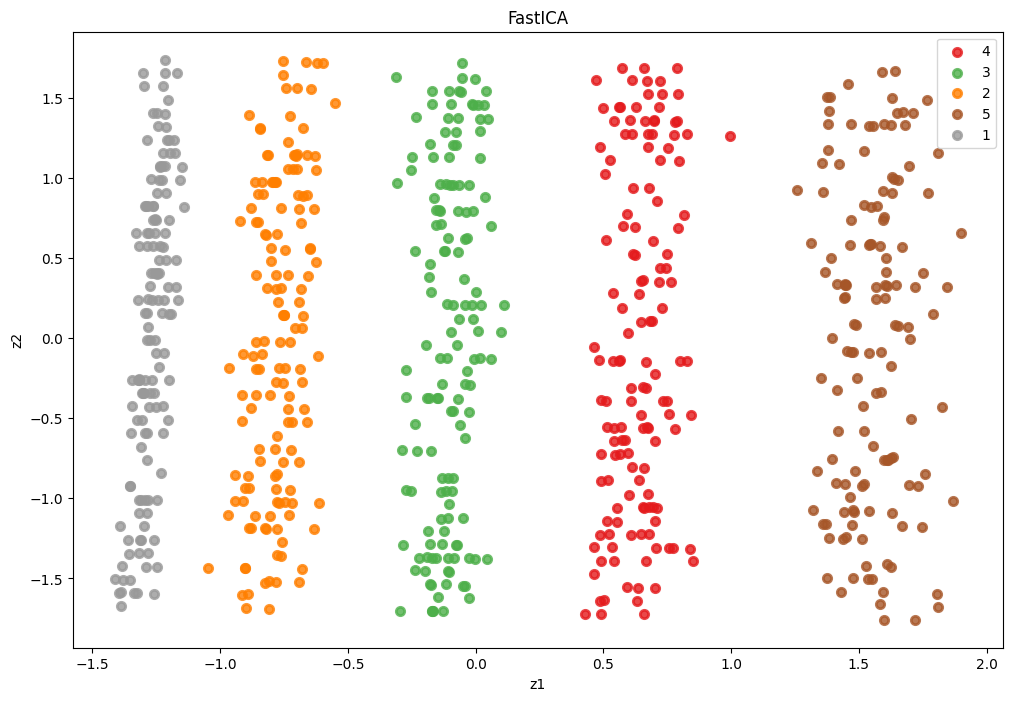

In [17]:
from sklearn.decomposition import FastICA

fast_ica = FastICA(n_components=2)
X_new = fast_ica.fit_transform(X)

unique_classes = y.unique()
colors = plt.cm.get_cmap("Set1", len(unique_classes))

# Визуализация
plt.figure(figsize=(12, 8))
for i, target_name in enumerate(unique_classes):
    plt.scatter(
        X_new[y == target_name, 0], X_new[y == target_name, 1],
        color=colors(i), alpha=0.8, lw=2, label=target_name
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.title("FastICA")
plt.show()

Для FastICA нет аналогичного анализа, но по графику видно, что классы описаны удачно

Нелинейные методы уменьшения размерности

Kernel PCA

<ipython-input-18-cb57444a1208>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("Set1", len(unique_classes))


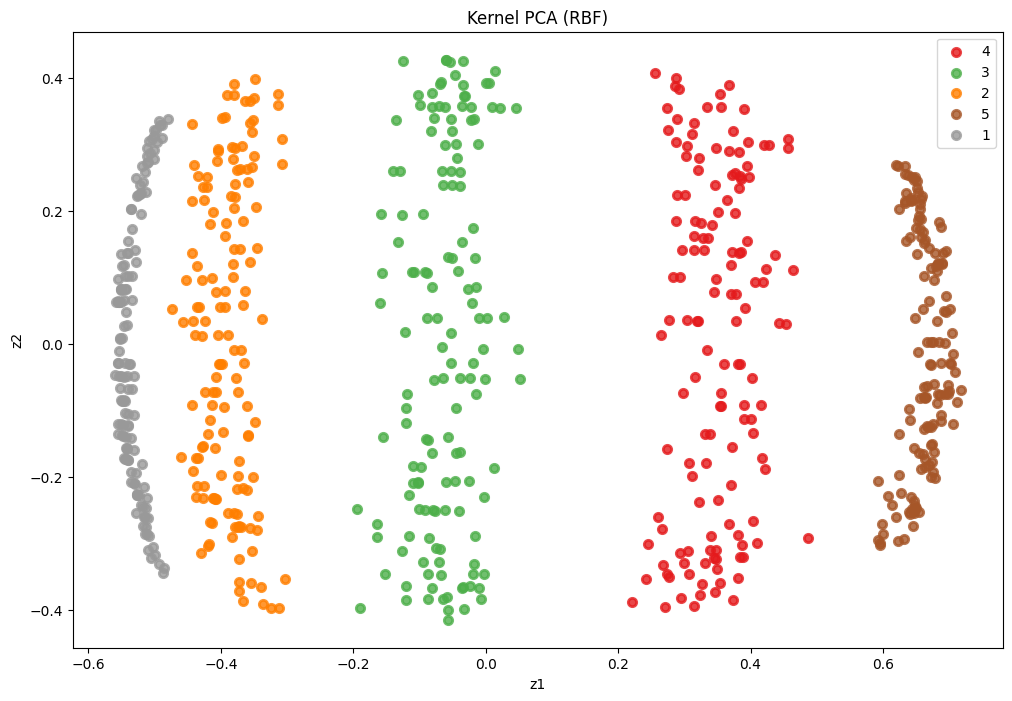

In [18]:
from sklearn.decomposition import KernelPCA


rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_new = rbf_pca.fit_transform(X)


unique_classes = y.unique()
colors = plt.cm.get_cmap("Set1", len(unique_classes))

# Визуализация
plt.figure(figsize=(12, 8))
for i, target_name in enumerate(unique_classes):
    plt.scatter(
        X_new[y == target_name, 0], X_new[y == target_name, 1],
        color=colors(i), alpha=0.8, lw=2, label=target_name
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.title("Kernel PCA (RBF)")
plt.show()

Хорошее разделение

<ipython-input-19-0db6670bbe5d>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("Set1", len(unique_classes))


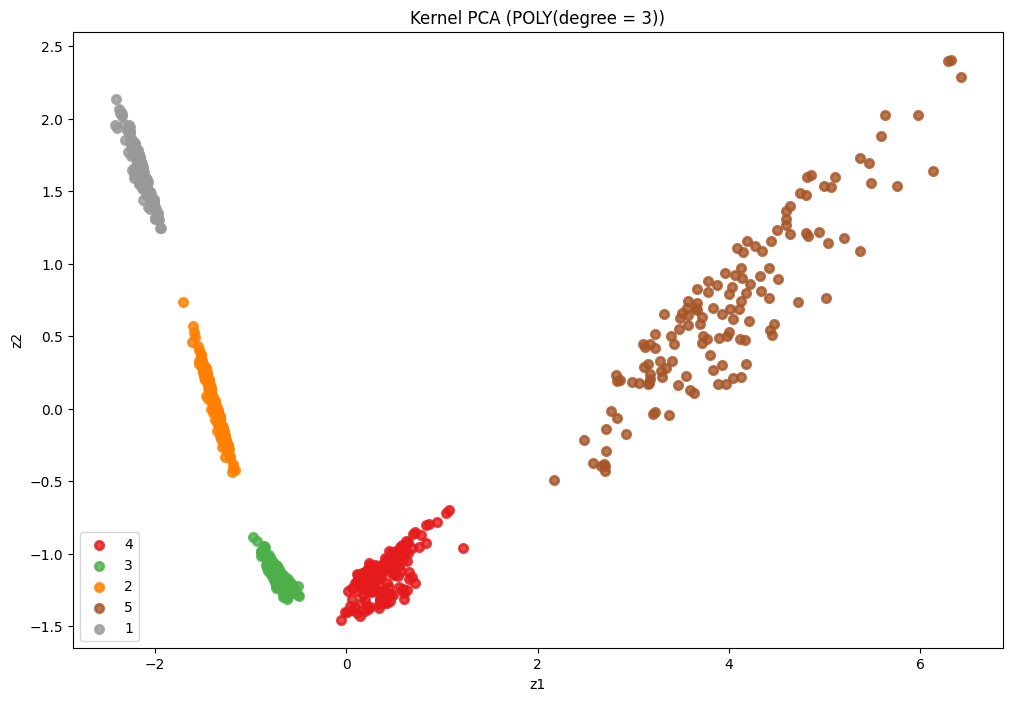

In [19]:
poly_pca = KernelPCA(n_components=2, kernel='poly', degree=3)
X_new = poly_pca.fit_transform(X)


unique_classes = y.unique()
colors = plt.cm.get_cmap("Set1", len(unique_classes))

# Визуализация
plt.figure(figsize=(12, 8))
for i, target_name in enumerate(unique_classes):
    plt.scatter(
        X_new[y == target_name, 0], X_new[y == target_name, 1],
        color=colors(i), alpha=0.8, lw=2, label=target_name
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.title("Kernel PCA (POLY(degree = 3))")
plt.show()

tSNE

In [20]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2)
X_new = tsne.fit_transform(X)


# Вывод результатов
print('Initial Shape of X: ', X.shape)
print('New Shape of X: ', X_new.shape)
print('Kullback-Leibler divergence after optimization: ', tsne.kl_divergence_)
print('No. of iterations: ', tsne.n_iter_)
#print('Embedding vectors: ', tsne.embedding_)

Initial Shape of X:  (700, 6)
New Shape of X:  (700, 2)
Kullback-Leibler divergence after optimization:  0.3259481191635132
No. of iterations:  999


Это значение KL-дивергенции, измеряет разницу между распределениями вероятностей в высокоразмерном пространстве и в 2D-пространстве. Низкое значение KL-дивергенции говорит о том, что t-SNE успешно сохранил структуру данных при уменьшении размерности. Значение 0.33 указывает на то, что модель достигла удовлетворительного результата, хотя для интерпретации необходимо учитывать, что t-SNE не имеет четкого диапазона значений.

<ipython-input-21-04fadc5c7693>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("Set1", len(unique_classes))


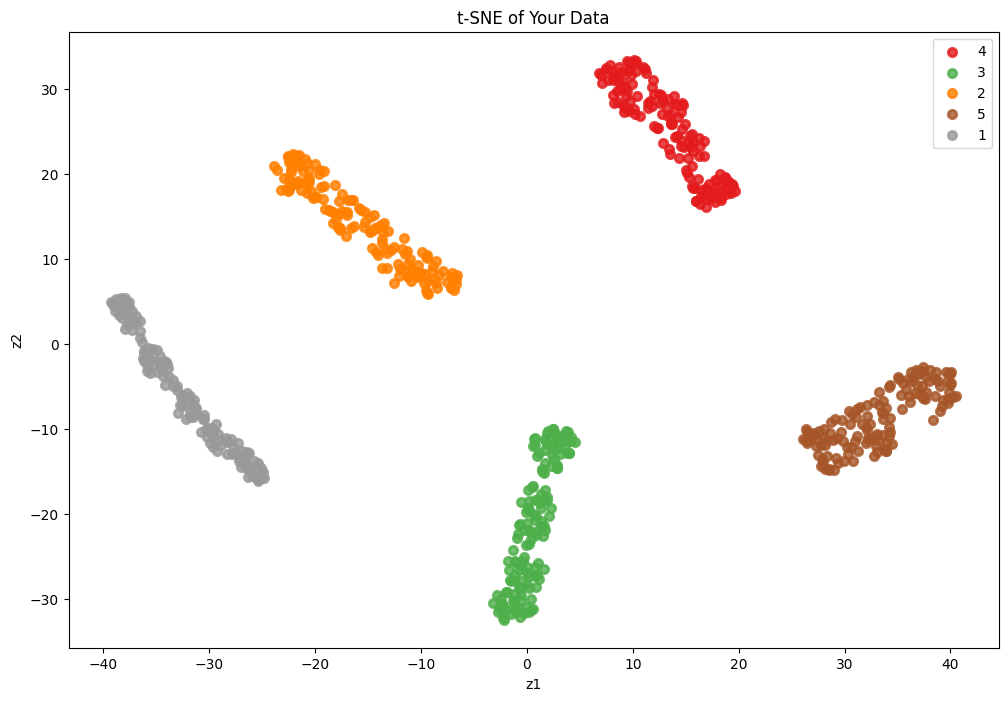

In [21]:
unique_classes = y.unique()
colors = plt.cm.get_cmap("Set1", len(unique_classes))

# Визуализация
plt.figure(figsize=(12, 8))
for i, target_name in enumerate(unique_classes):
    plt.scatter(
        X_new[y == target_name, 0], X_new[y == target_name, 1],
        color=colors(i), alpha=0.8, lw=2, label=target_name
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.title("t-SNE of Your Data")
plt.show()


Поиск выбросов. DBSCAN

In [22]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score


dbscan_cluster1 = DBSCAN(eps = 0.5, min_samples = len(y.unique()) + 1)
X_new = dbscan_cluster1.fit(X)


# Number of Clusters
labels=dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 8
Estimated no. of noise points: 163
v_measure = 0.8406901708264054


{0, 1, 2, 3, 4, 5, 6, 7, -1}


<ipython-input-23-9d61fbfcfdd5>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('hsv', len(unique_labels))


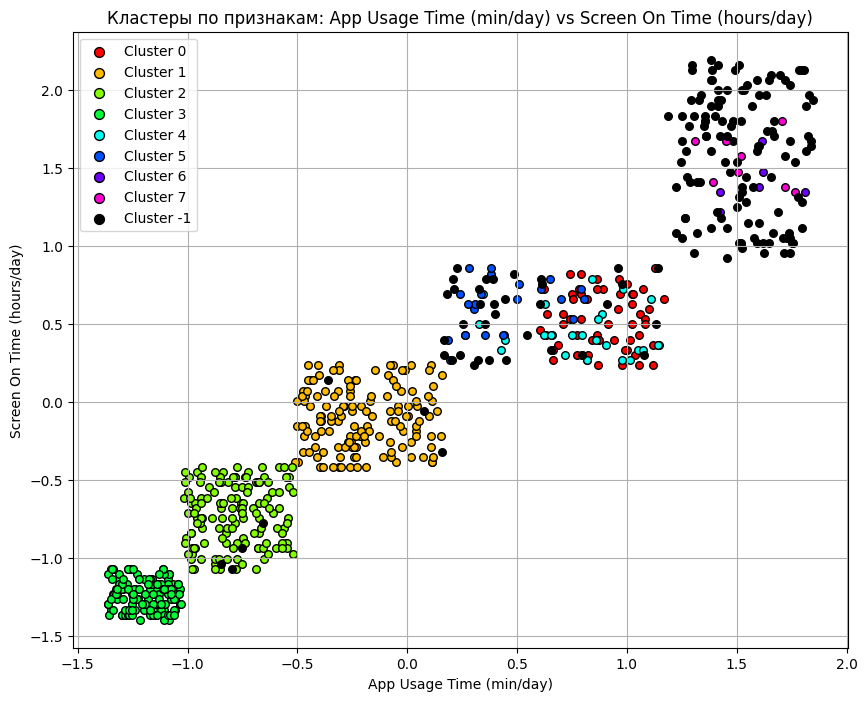

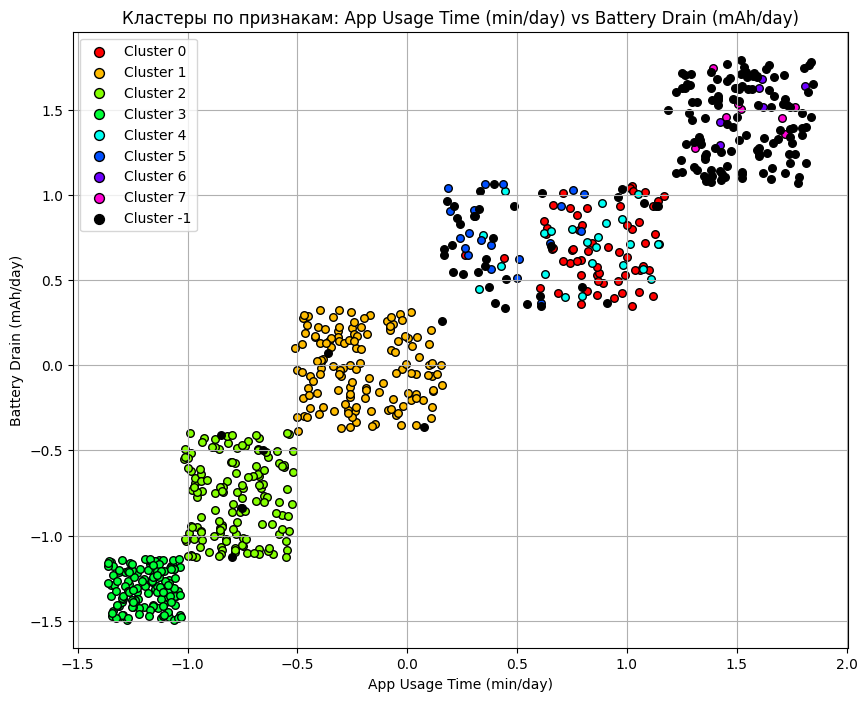

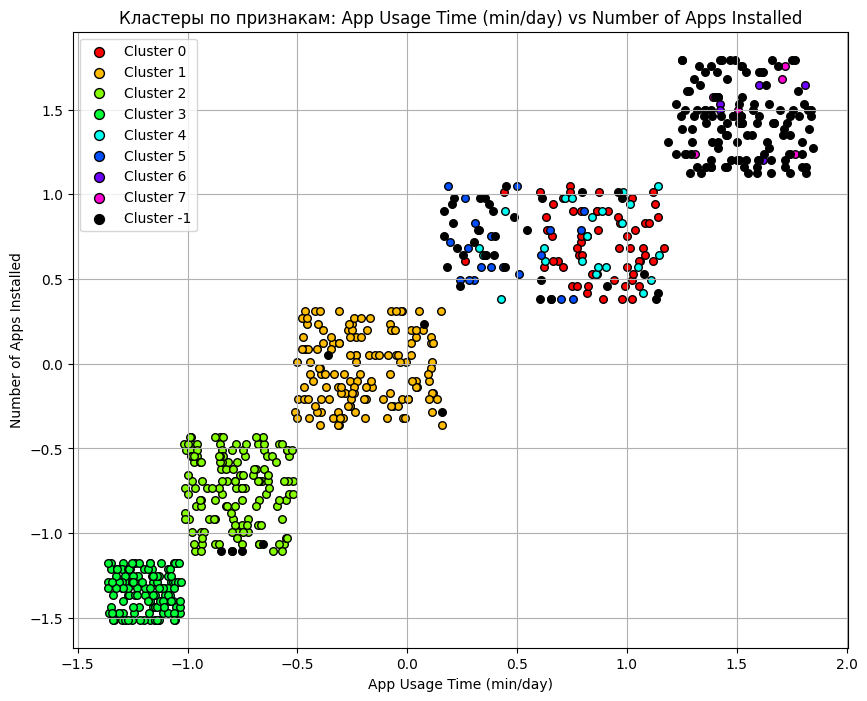

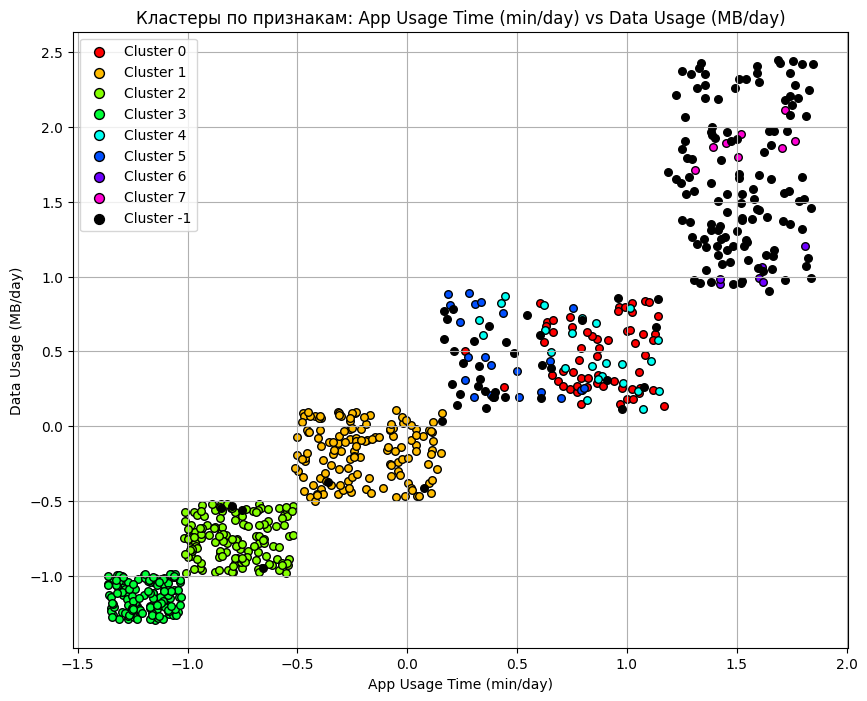

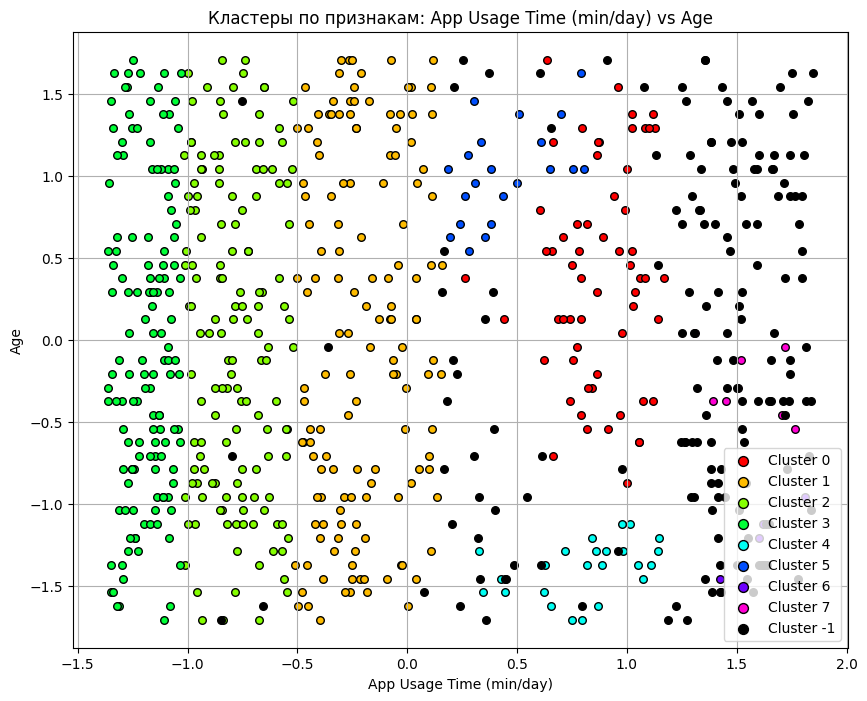

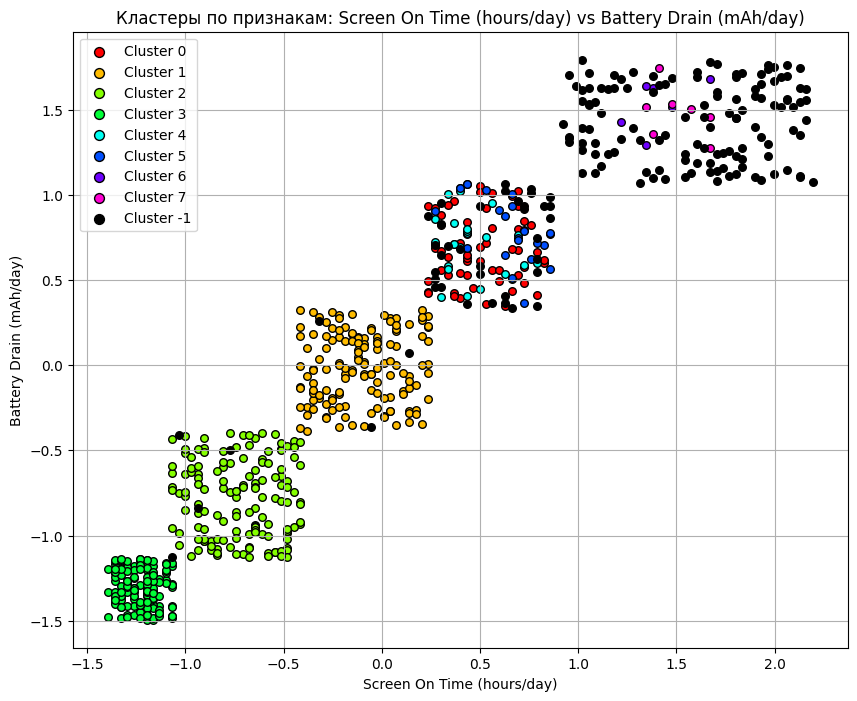

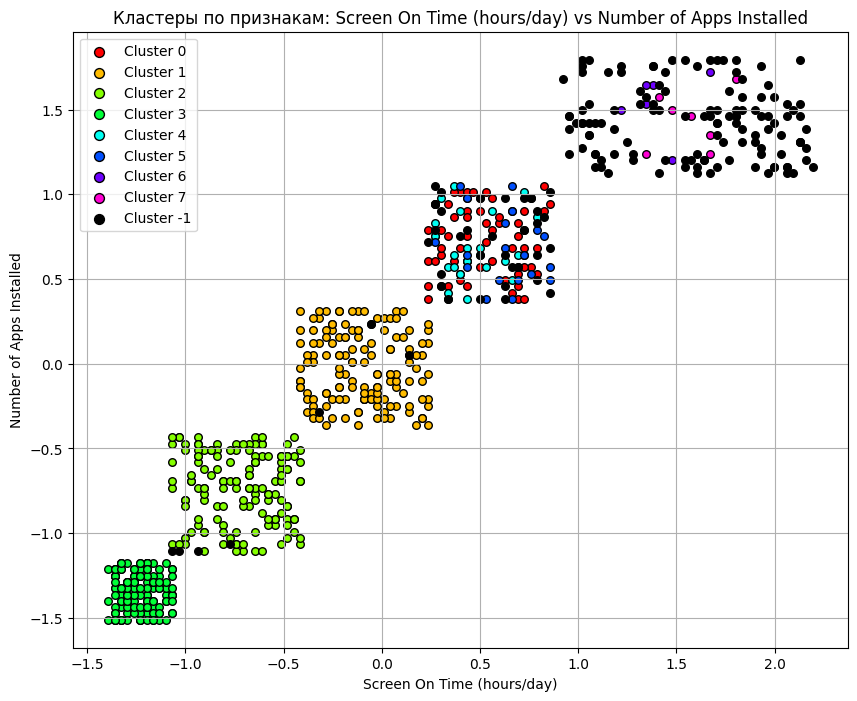

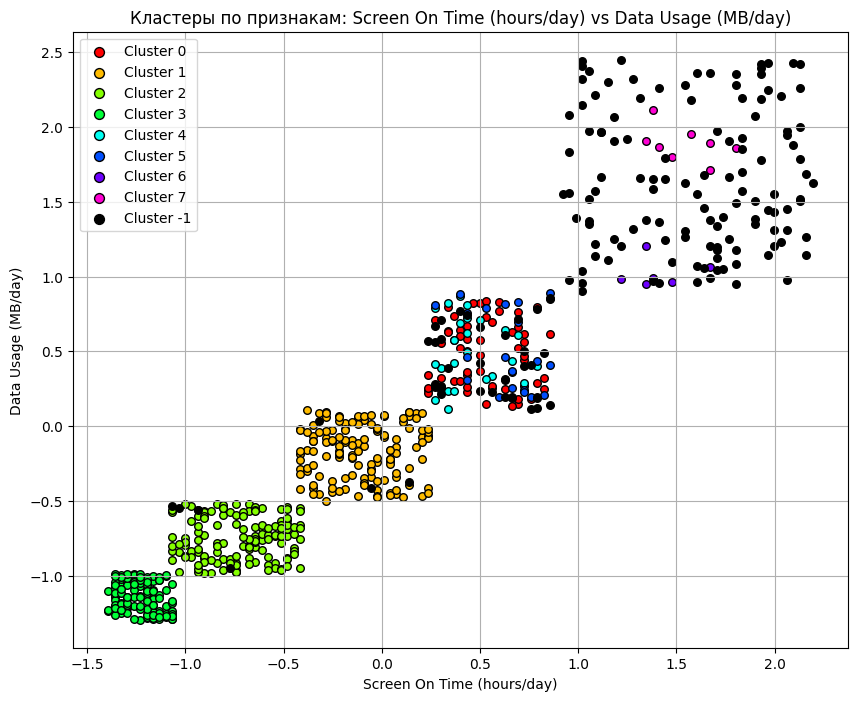

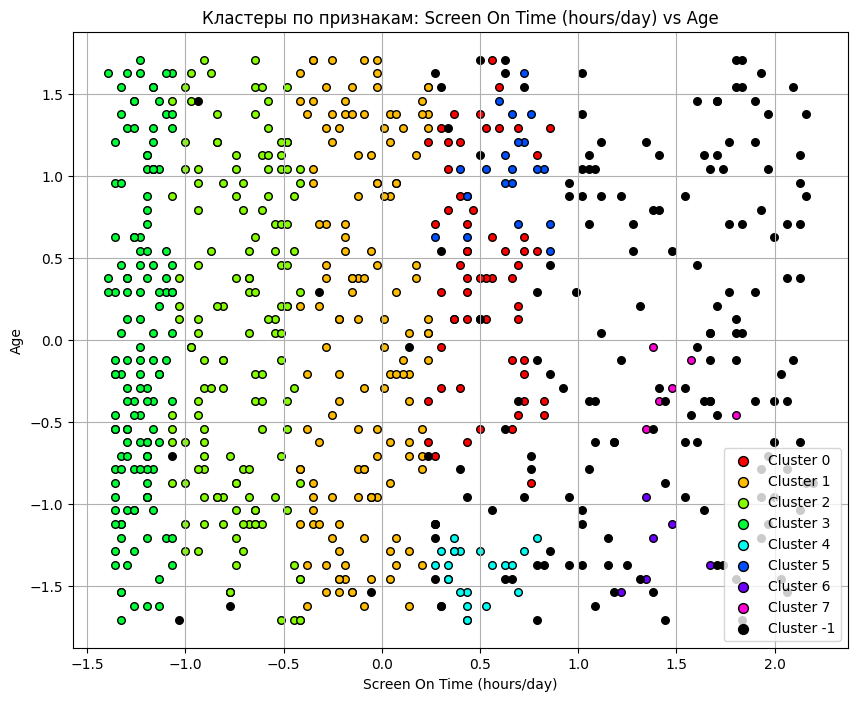

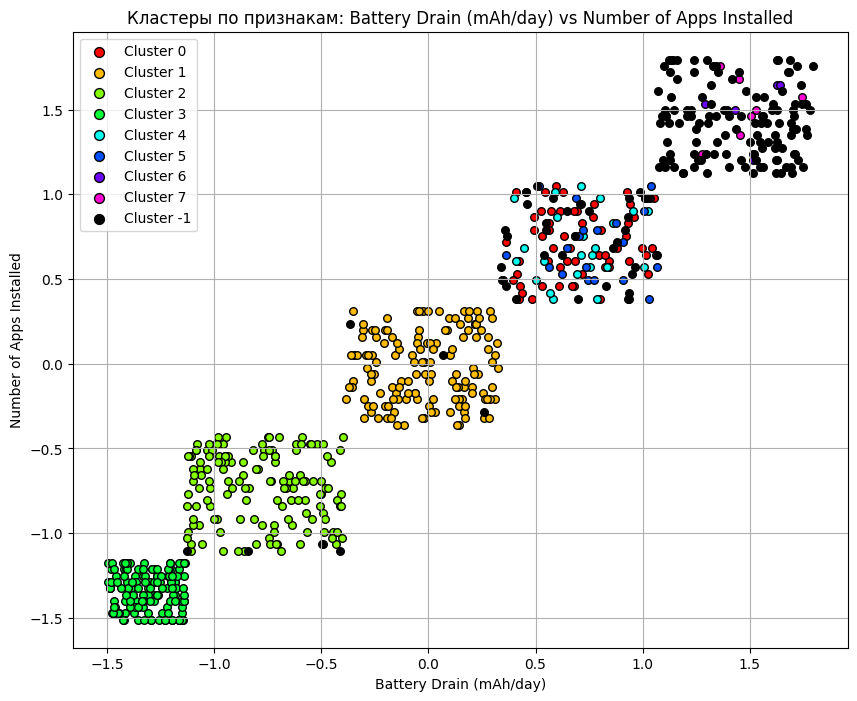

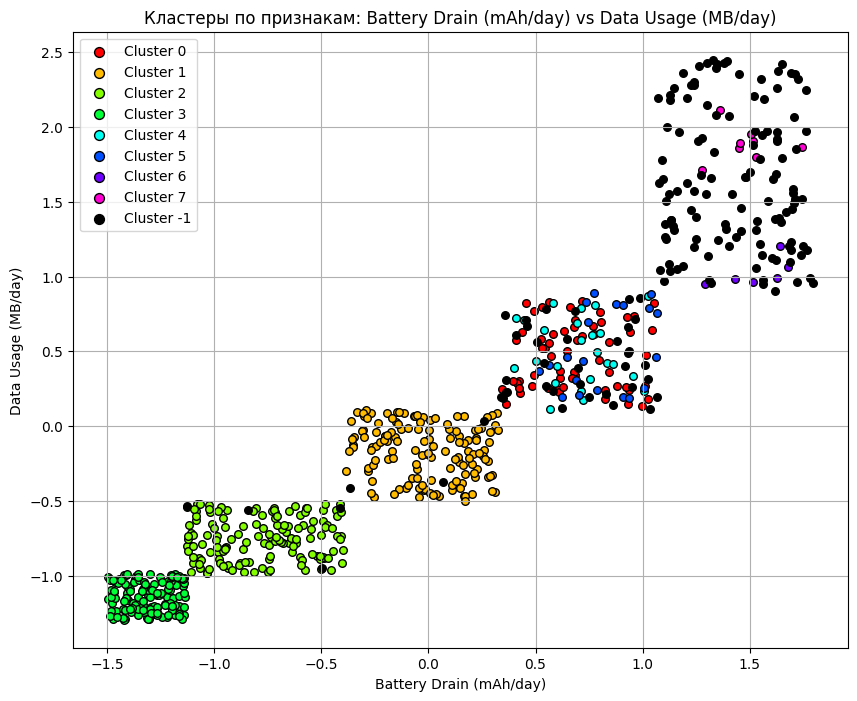

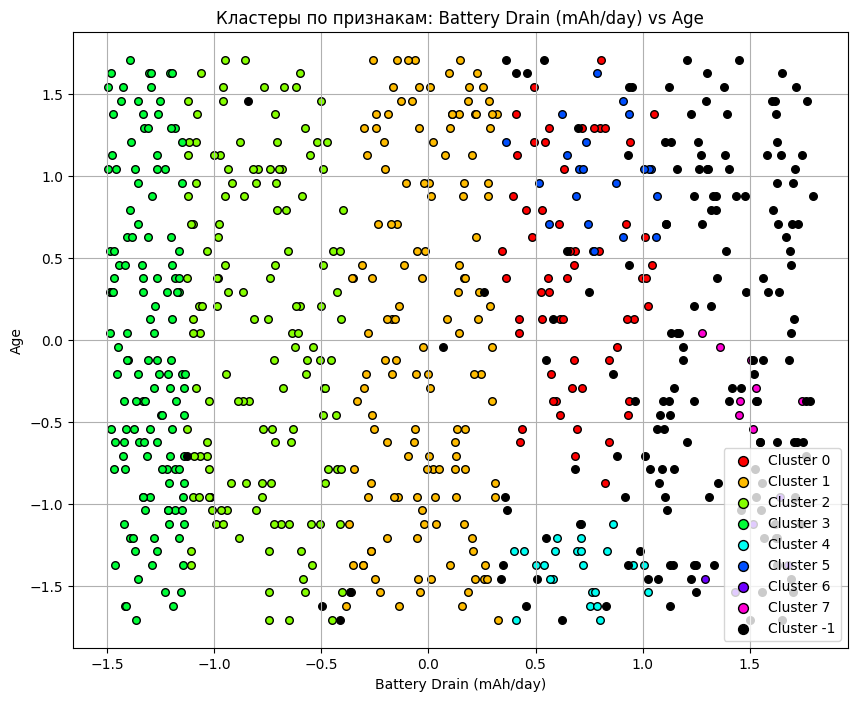

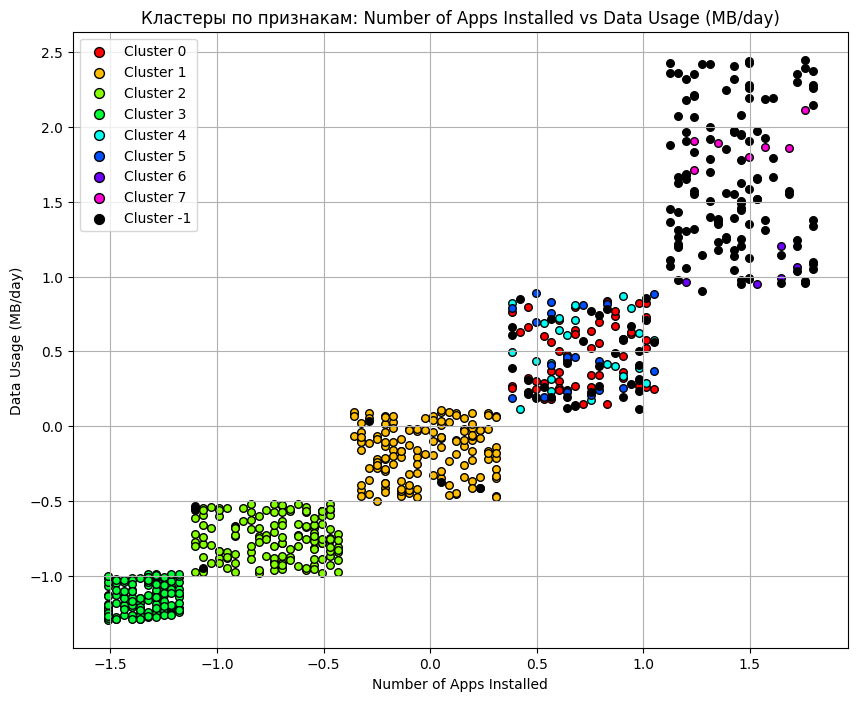

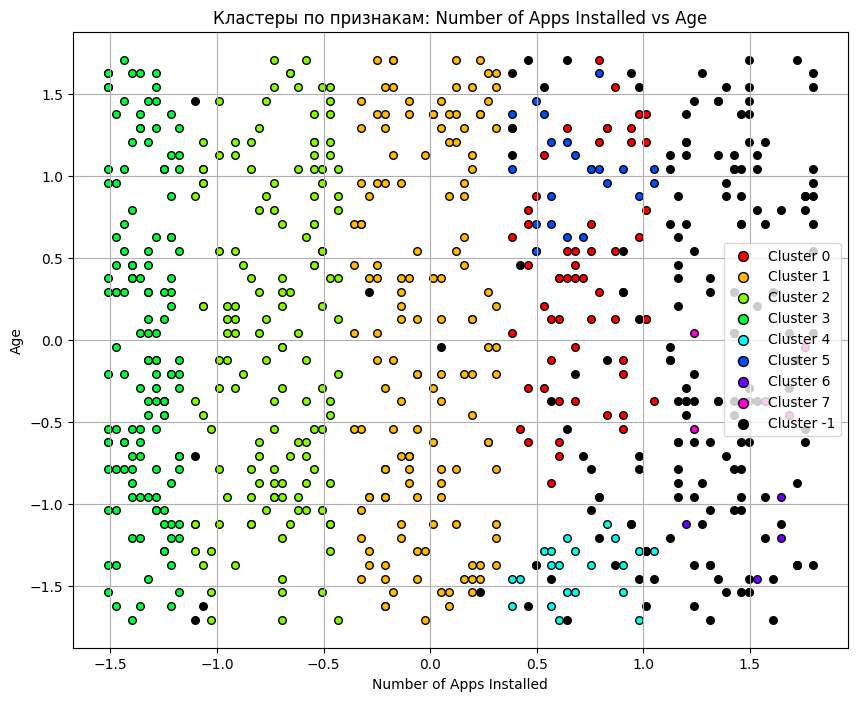

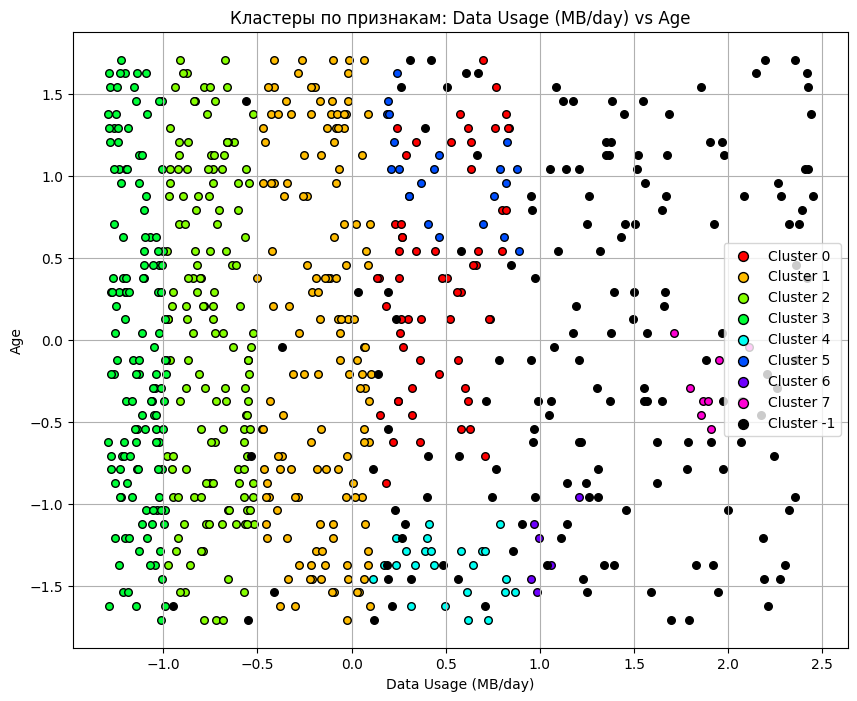

In [23]:
# Получение уникальных меток кластеров
unique_labels = set(labels)
print(unique_labels)
colors = plt.cm.get_cmap('hsv', len(unique_labels))

num_features = X.columns
core_samples_mask = np.zeros_like(labels, dtype=bool)  # Замените на вашу логику для core_samples_mask

for i in range(len(num_features)):
    for j in range(i + 1, len(num_features)):
        feature1 = num_features[i]
        feature2 = num_features[j]

        plt.figure(figsize=(10, 8))  # Создайте новую фигуру для каждой пары

        for k in unique_labels:
            col = colors(k)  # Используем сгенерированный цвет

            if k == -1:  # Если это шум
                col = 'k'

            class_member_mask = (labels == k)

            # Точки, принадлежащие ядру
            xy = X[class_member_mask & core_samples_mask]
            plt.scatter(xy[feature1], xy[feature2], marker='o', facecolors=col,
                        edgecolor='k', s=50, label=f'Cluster {k}')

            # Точки, не принадлежащие ядру
            xy = X[class_member_mask & ~core_samples_mask]
            plt.scatter(xy[feature1], xy[feature2], marker='o', facecolors=col,
                        edgecolor='k', s=30)

        plt.title(f'Кластеры по признакам: {feature1} vs {feature2}')
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.legend(loc='best', shadow=False, scatterpoints=1)
        plt.grid(True)
        plt.show()

Чтобы правильно опрделить число eps, воспользуемся правилом локтя.

Для этого выведем график изменения средних расстояний от каждой точки до min_samples ближайших.

In [24]:
from sklearn.neighbors import NearestNeighbors


min_samples = len(unique_classes)

knn = NearestNeighbors(n_neighbors = min_samples, metric = 'l2')
knn.fit(X)

dists, inds = knn.kneighbors(X)
dists_ar = dists[:, 1:min_samples].mean(axis=1)
dists_ar.sort()


import sklearn
#возможные метрики расстояния
sklearn.metrics.pairwise.distance_metrics()

{'cityblock': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'cosine': <function sklearn.metrics.pairwise.cosine_distances(X, Y=None)>,
 'euclidean': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'haversine': <function sklearn.metrics.pairwise.haversine_distances(X, Y=None)>,
 'l2': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'l1': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'manhattan': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'precomputed': None,
 'nan_euclidean': <function sklearn.metrics.pairwise.nan_euclidean_distances(X, Y=None, *, squared=False, missing_values=nan, copy=True)>}

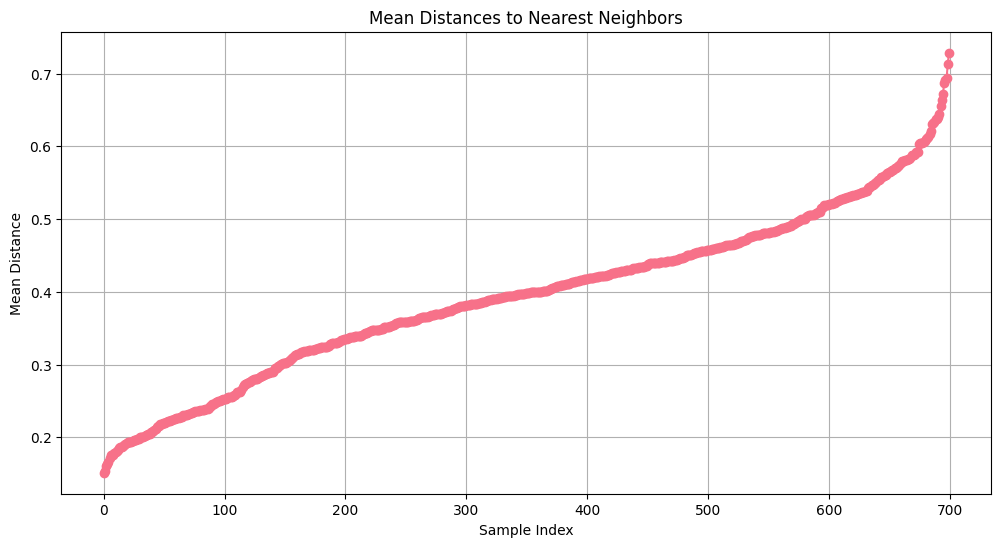

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(dists_ar, marker='o')
plt.title('Mean Distances to Nearest Neighbors')
plt.xlabel('Sample Index')
plt.ylabel('Mean Distance')
plt.grid()
plt.show()

eps выбирают в точке изгиба графика, возьмем 0.6

In [26]:
dbscan = DBSCAN(eps = 0.6, min_samples=len(y.unique()) + 1)


pred = dbscan.fit_predict(X)


# Number of Clusters
labels=dbscan.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 6
Estimated no. of noise points: 40
v_measure = 0.8263640367285894


{0, 1, 2, 3, 4, 5, -1}


<ipython-input-27-a1d0f4dd2d8c>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('hsv', len(unique_labels))


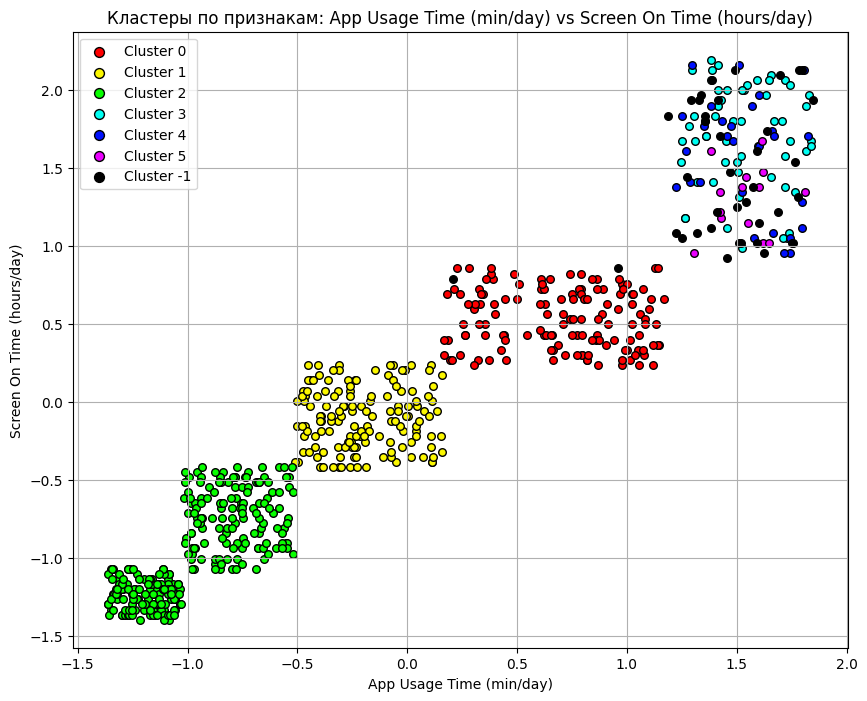

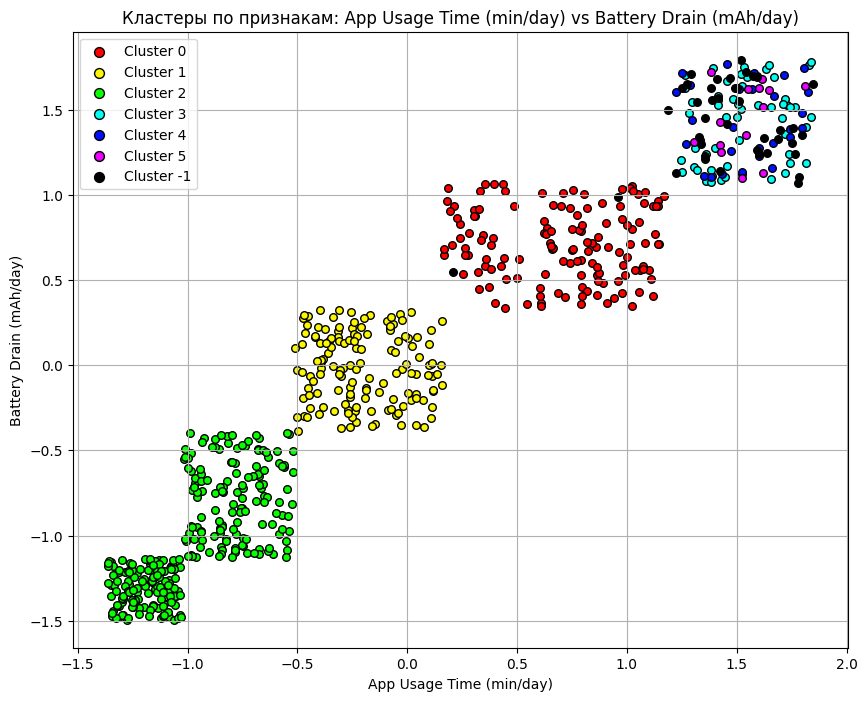

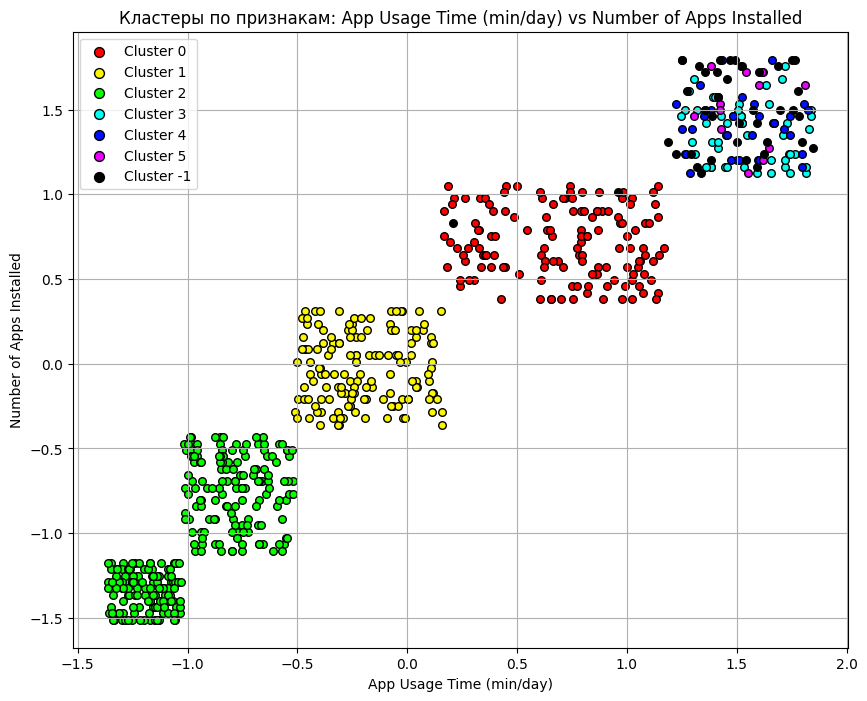

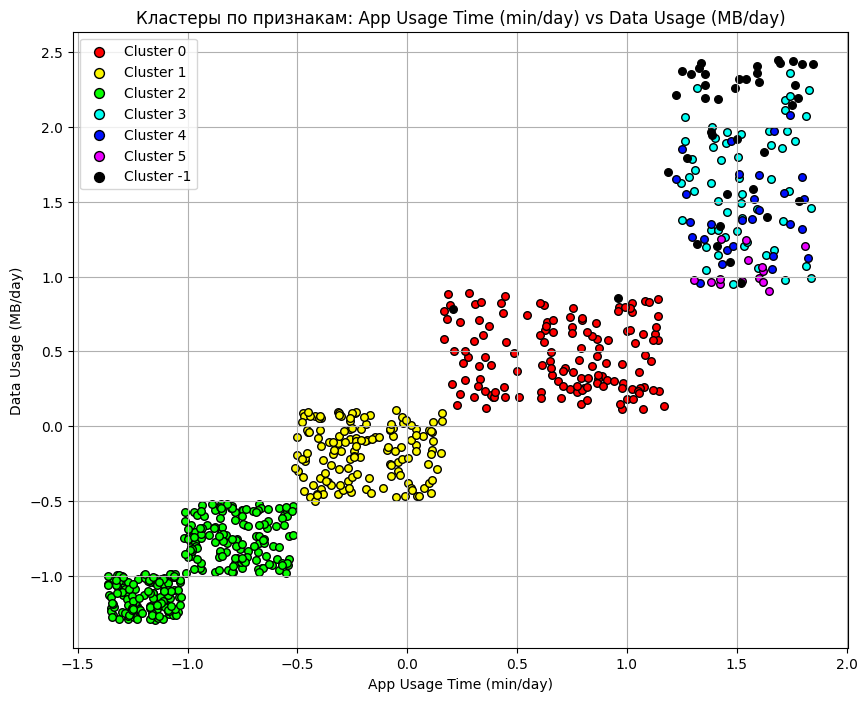

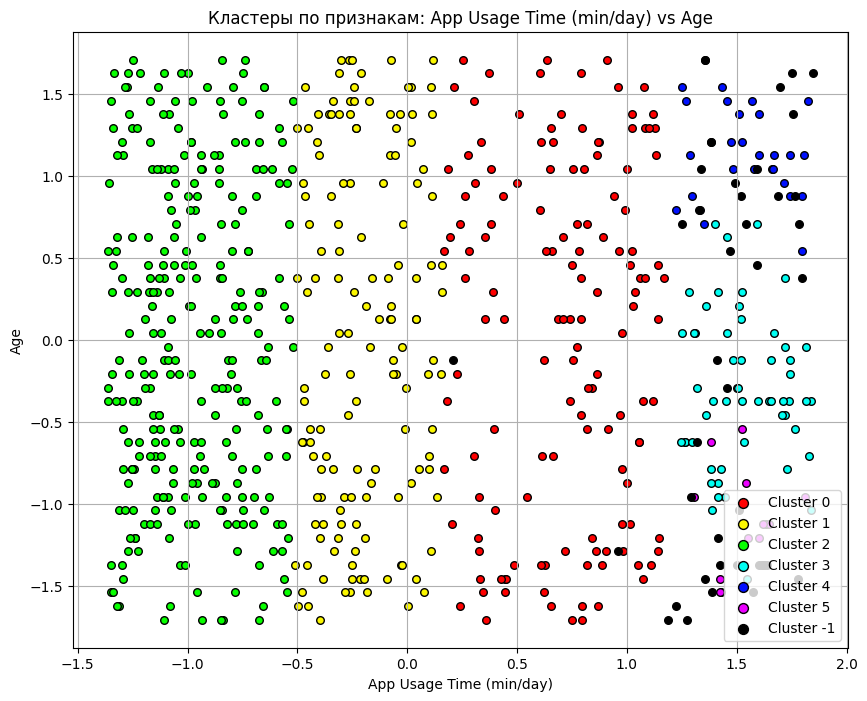

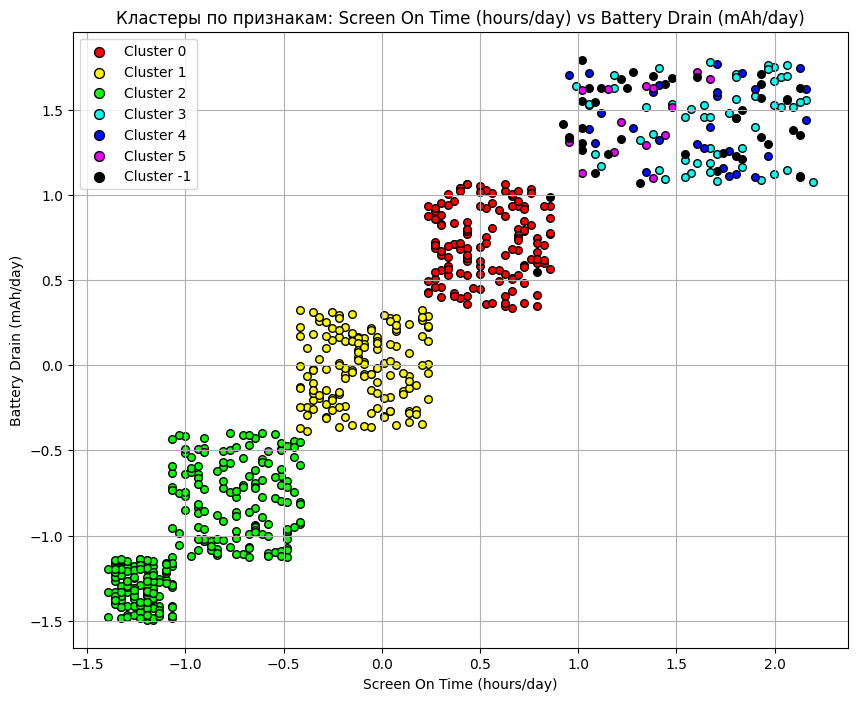

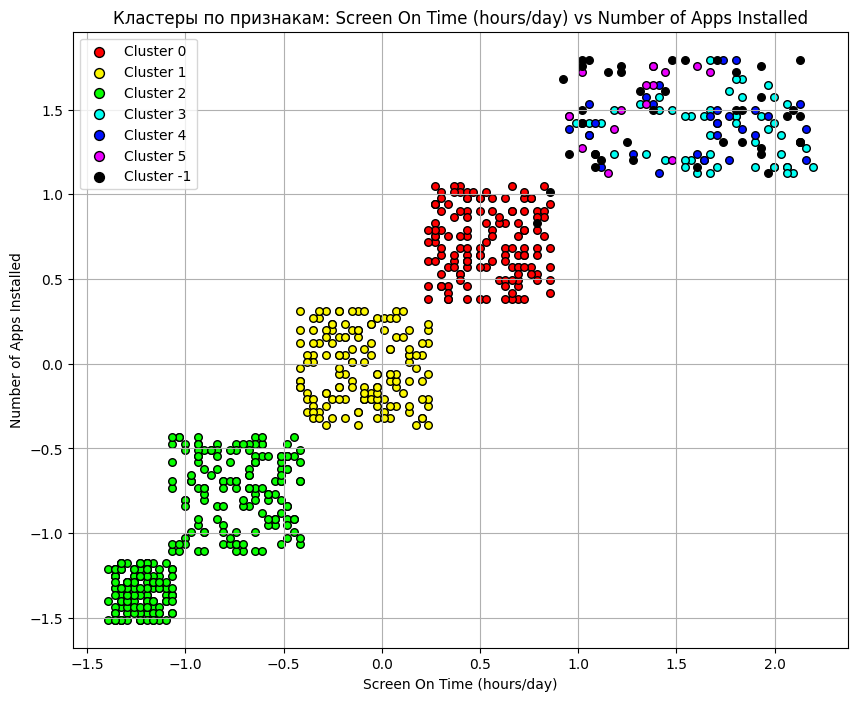

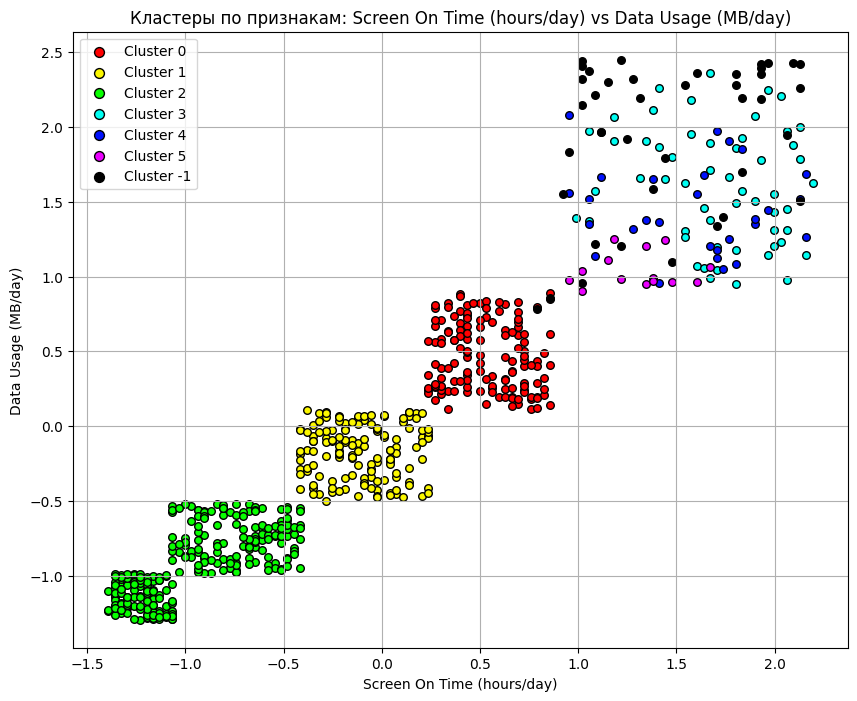

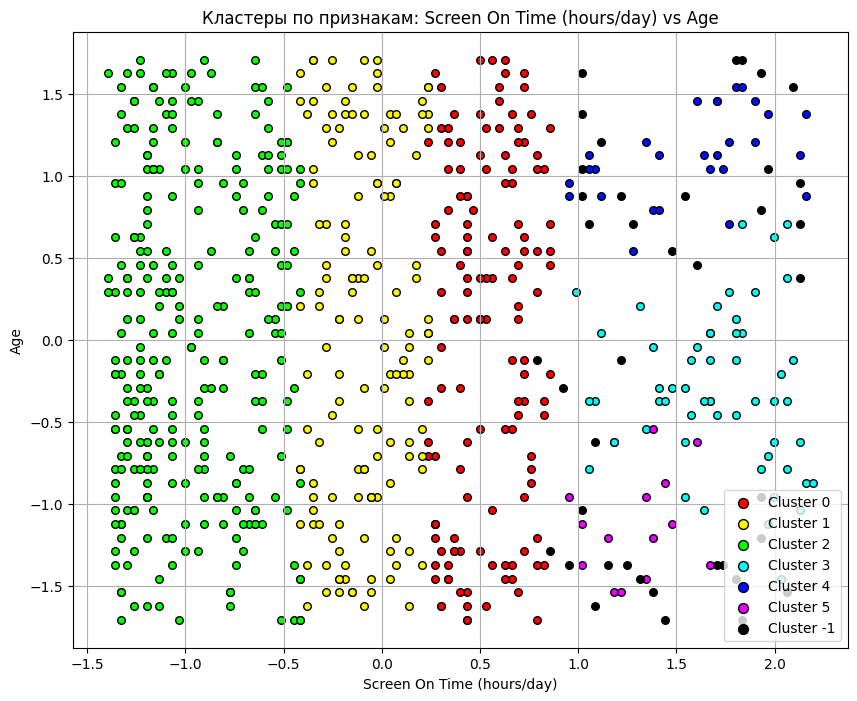

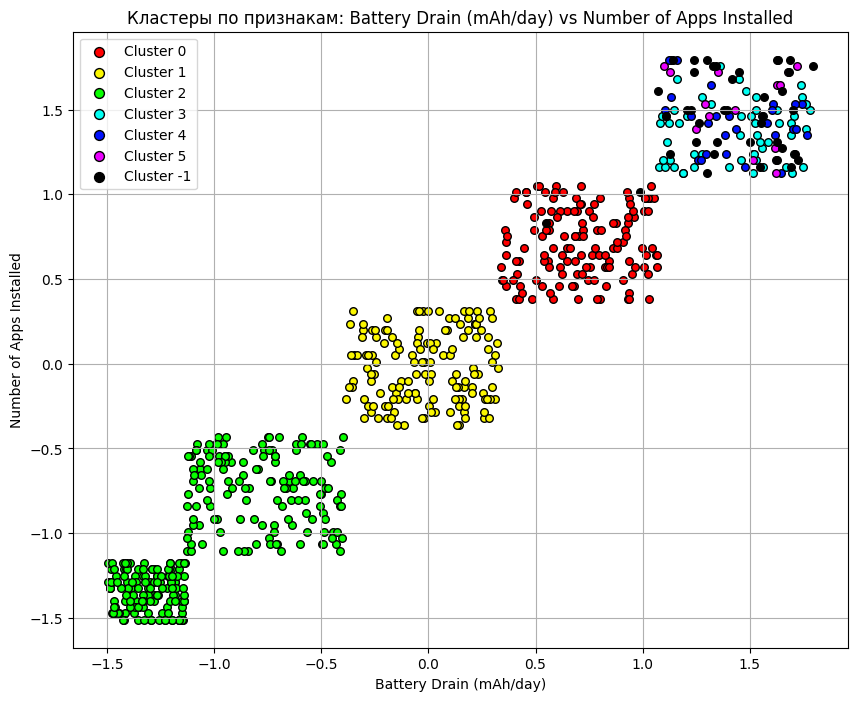

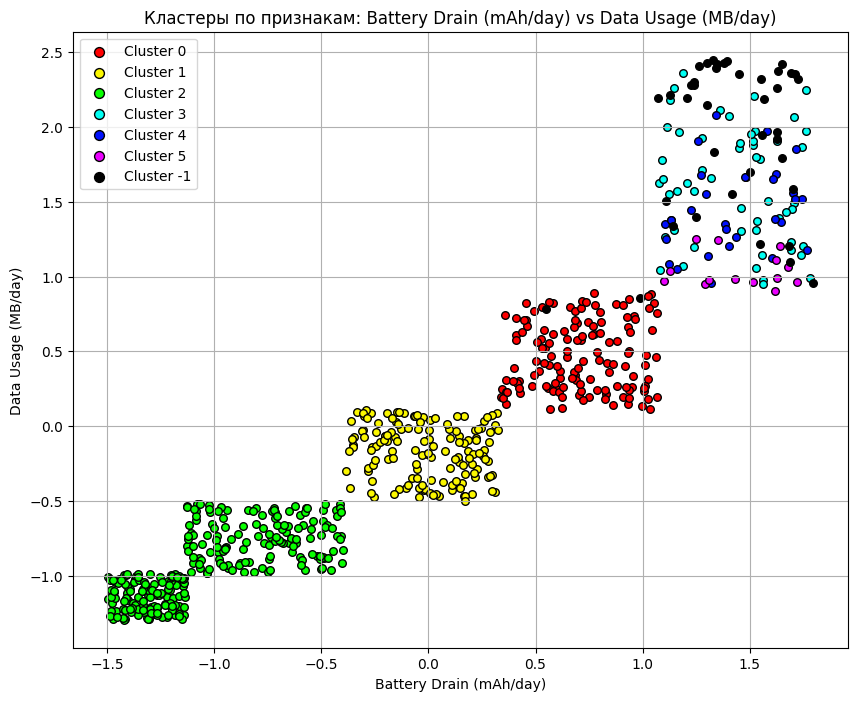

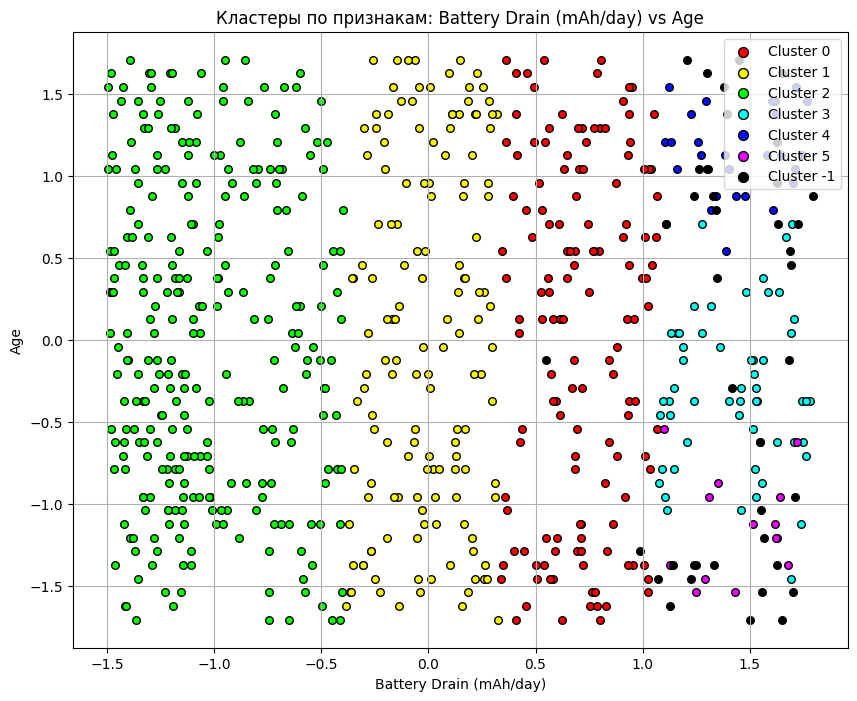

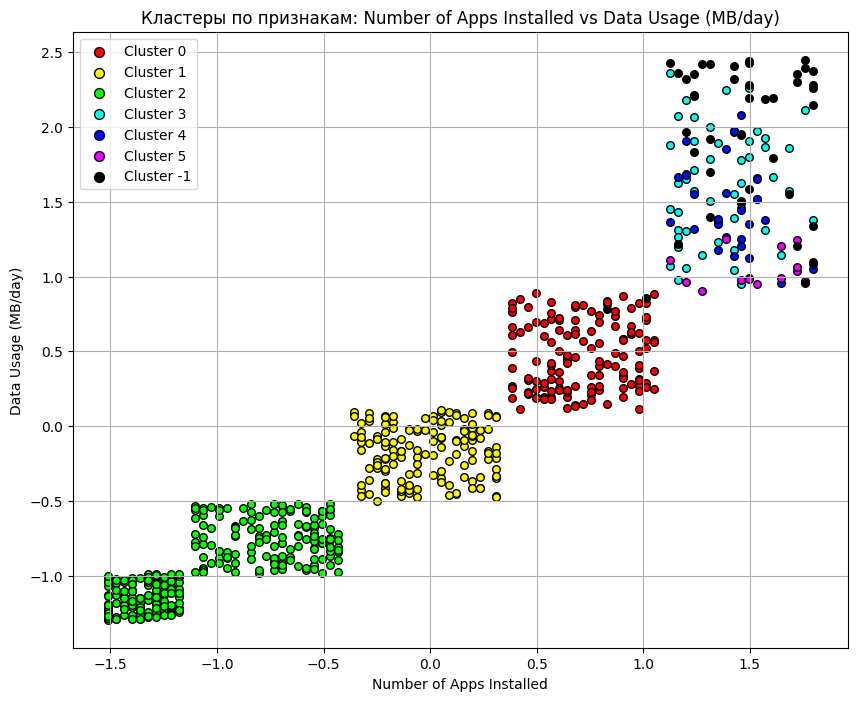

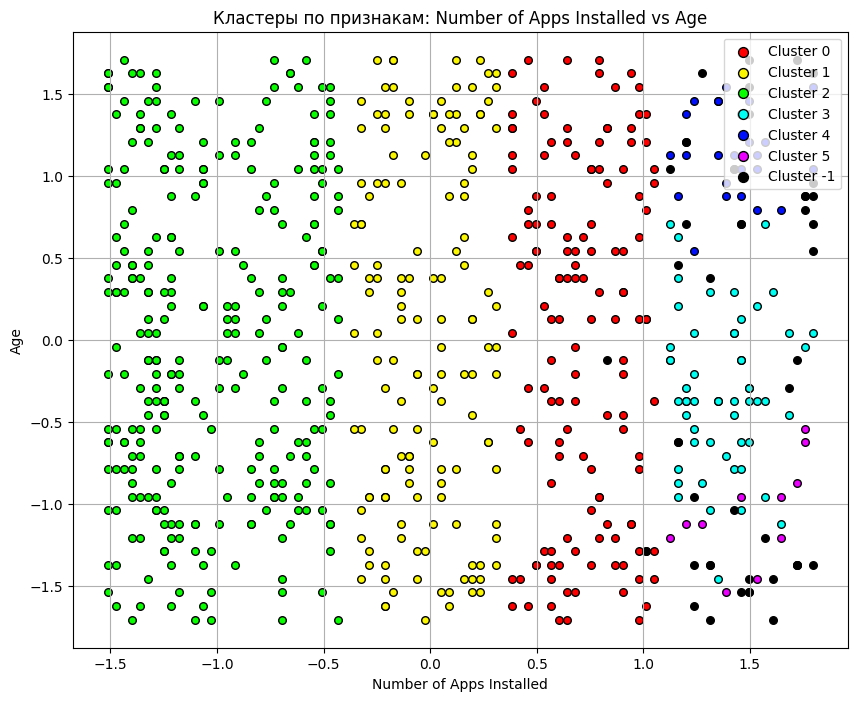

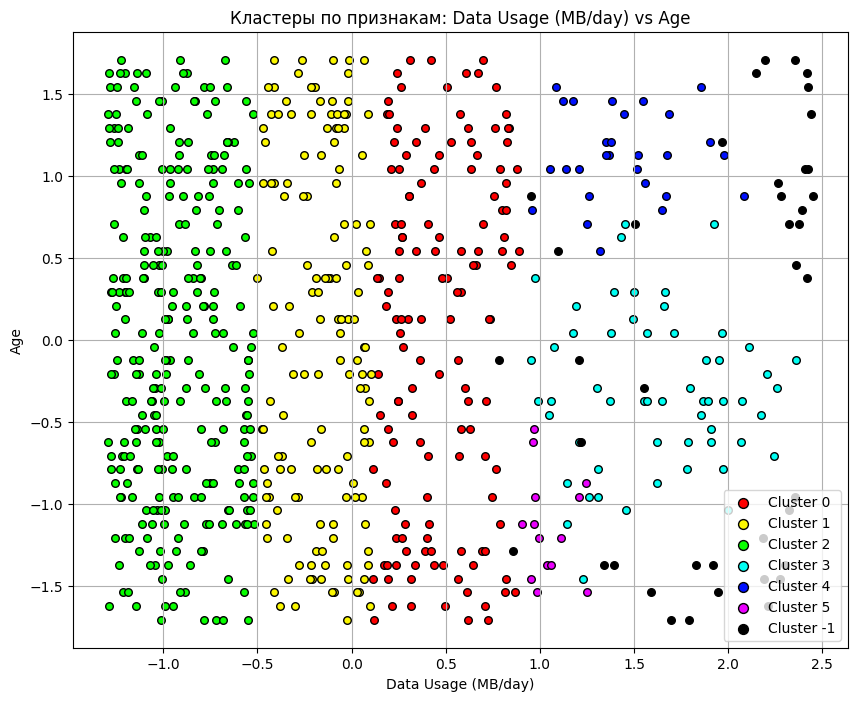

In [27]:
# у анномалий - класс -1, ищем все номера строк с таким классом, потом отбираем эти строки из начального набора данных

anom_index = [i for i in range(len(pred)) if pred[i] == -1]
values = X.loc[anom_index]


# Получение уникальных меток кластеров
unique_labels = set(labels)
print(unique_labels)
colors = plt.cm.get_cmap('hsv', len(unique_labels))

num_features = X.columns
core_samples_mask = np.zeros_like(labels, dtype=bool)  # Замените на вашу логику для core_samples_mask

for i in range(len(num_features)):
    for j in range(i + 1, len(num_features)):
        feature1 = num_features[i]
        feature2 = num_features[j]

        plt.figure(figsize=(10, 8))  # Создайте новую фигуру для каждой пары

        for k in unique_labels:
            col = colors(k)  # Используем сгенерированный цвет

            if k == -1:  # Если это шум
                col = 'k'

            class_member_mask = (labels == k)

            # Точки, принадлежащие ядру
            xy = X[class_member_mask & core_samples_mask]
            plt.scatter(xy[feature1], xy[feature2], marker='o', facecolors=col,
                        edgecolor='k', s=50, label=f'Cluster {k}')

            # Точки, не принадлежащие ядру
            xy = X[class_member_mask & ~core_samples_mask]
            plt.scatter(xy[feature1], xy[feature2], marker='o', facecolors=col,
                        edgecolor='k', s=30)

        plt.title(f'Кластеры по признакам: {feature1} vs {feature2}')
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.legend(loc='best', shadow=False, scatterpoints=1)
        plt.grid(True)
        plt.show()